# CSE Example
This is an example constant shift embeddigs (CSE) applied two categories from the 20 Newsgroups dataset (http://qwone.com/~jason/20Newsgroups/). A representation can then be

In short, the CSE uses a notion of similarity (or dissimilarity) and from this creates an embeddings in euclidean space (where euclidean (normal) distance can be used). Here the Jaccard similarity has been used in combination with a binary bag-of-words approach to form a simple example.




The code of the CSE implementation is based on:

`V. Roth, J. Laub, M. Kawanabe, and J.M. Buhmann.  
"Optimal cluster preserving embedding of nonmetric proximity data".  
Pattern Analysis and Machine Intelligence, IEEE Transactions on, 25(12):1540–1551`

In [1]:
import numpy as np
from CSE import CSE

### Data
The categories 'soc.religion.christian' and 'misc.forsale' were chosen as they are "highly unrelated" (http://qwone.com/~jason/20Newsgroups/)

In [201]:
from sklearn.datasets import fetch_20newsgroups
categories = ('soc.religion.christian', 'misc.forsale')
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), 
                                      categories=categories)

In [202]:
X = newsgroups_train.data
y = newsgroups_train.target

### Preprocessing and Tokenization
No preprocessing and tokenization through the nlkt punkt 'word_tokenize'

In [203]:
from nltk.tokenize import word_tokenize

tokens = [word_tokenize(t) for t in X]

### Binary bag-of-words
From the tokenized sentences a binary bag-of-words representtion is fetched. 

In [224]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x, binary=True)

count_matrix = vectorizer.fit_transform(tokens)

In [225]:
# Jaccard similarites calculated
from similarities import jaccard_similarity_sparse as jac_sim
sim = jac_sim.auto_sim(count_matrix)

### CSE
CSE implementation applied to the calculated similarites, 

In [226]:
cse = CSE(dimensions=2)
embed = cse.fit_transform(sim)

### Visualization
2-dimensional embeddings shown in a scatter-plot, 'soc.religion.christian' shown as red and 'misc.forsale' shown as blue. While these certainly have some overlap, a seperation between the two categories can be seen.

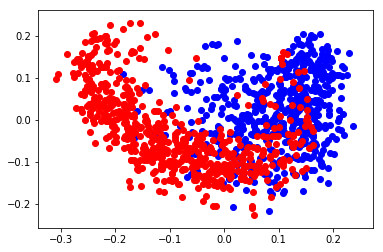

In [227]:
import matplotlib.pyplot as plt
colors = ('blue', 'red')


for i, col in enumerate(colors):
    subset = embed[y==i,]
    plt.scatter(subset[:,0], subset[:,1], c=col)
plt.show()